In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math,copy

In [2]:
x_train = np.array([ 75.1,74.3,88.7,114.6,98.5,112,114.8,62.2,107,90.5,73.8,115.8,99.4,93,73.9,65.7,77.9,109.8,105.4,88.6,89.6,73.8,101.3,75.9,76.2,81.9,84.3,98 ])
y_train = np.array([ 577.8,577,570.9,572.4,411.2,531.7,563.9,406.7,507.1,496.4,505.2,506.4,510.2,503.9,506.2,506.3,510.2,508.6,510.9,505.4,512.8,502.8,510.8,512.8,513.4,510,504.3,522 ])

#sorting the data
x_train = np.sort(x_train)
y_train = np.sort(y_train)

m = x_train.shape[0]    # 'm' is the total no of data in the set

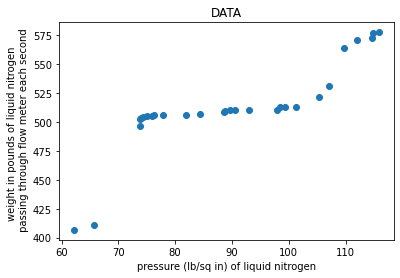

In [3]:
plt.title("DATA")
plt.xlabel("pressure (lb/sq in) of liquid nitrogen")
plt.ylabel("weight in pounds of liquid nitrogen \n passing through flow meter each second")
plt.scatter(x_train,y_train)
plt.show()

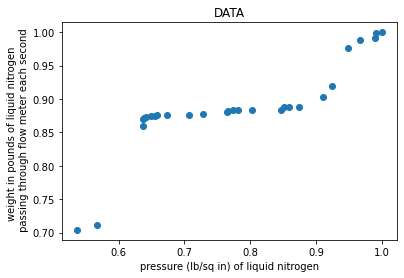

In [4]:
#Scaling the dataset
x_scale=np.max(x_train)
y_scale=np.max(y_train)
x_train=x_train/x_scale
y_train=y_train/y_scale
plt.title("DATA")
plt.xlabel("pressure (lb/sq in) of liquid nitrogen")
plt.ylabel("weight in pounds of liquid nitrogen \n passing through flow meter each second")
plt.scatter(x_train,y_train)
plt.show()

In [5]:
print(x_train)
print(x_train.shape)
x_train=x_train.reshape(m,-1)
print(x_train)
print(x_train.shape)

[0.53713299 0.56735751 0.6373057  0.6373057  0.63816926 0.64162349
 0.64853195 0.65544041 0.65803109 0.67271157 0.70725389 0.72797927
 0.76511226 0.76597582 0.77374784 0.78151986 0.80310881 0.8462867
 0.85060449 0.85837651 0.87478411 0.91018998 0.92400691 0.94818653
 0.9671848  0.98963731 0.99136442 1.        ]
(28,)
[[0.53713299]
 [0.56735751]
 [0.6373057 ]
 [0.6373057 ]
 [0.63816926]
 [0.64162349]
 [0.64853195]
 [0.65544041]
 [0.65803109]
 [0.67271157]
 [0.70725389]
 [0.72797927]
 [0.76511226]
 [0.76597582]
 [0.77374784]
 [0.78151986]
 [0.80310881]
 [0.8462867 ]
 [0.85060449]
 [0.85837651]
 [0.87478411]
 [0.91018998]
 [0.92400691]
 [0.94818653]
 [0.9671848 ]
 [0.98963731]
 [0.99136442]
 [1.        ]]
(28, 1)


In [15]:
X_train=np.hstack([x_train,x_train**2,x_train**3,x_train**4,x_train**5])
#numpy.hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array.
print(X_train)

[[0.53713299 0.28851185 0.15496923 0.08323909 0.04471046]
 [0.56735751 0.32189455 0.18262929 0.1036161  0.05878737]
 [0.6373057  0.40615855 0.25884716 0.16496477 0.10513299]
 [0.6373057  0.40615855 0.25884716 0.16496477 0.10513299]
 [0.63816926 0.40726    0.25990081 0.16586071 0.10584721]
 [0.64162349 0.4116807  0.26414401 0.169481   0.10874299]
 [0.64853195 0.42059369 0.27276845 0.17689905 0.11472469]
 [0.65544041 0.42960214 0.2815786  0.184558   0.12096677]
 [0.65803109 0.43300491 0.28493069 0.18749325 0.12337639]
 [0.67271157 0.45254086 0.30442947 0.20479323 0.13776677]
 [0.70725389 0.50020806 0.35377409 0.2502081  0.17696065]
 [0.72797927 0.52995382 0.3857954  0.28085106 0.20445375]
 [0.76511226 0.58539677 0.44789425 0.34268938 0.26219585]
 [0.76597582 0.58671896 0.44941253 0.34423913 0.26367885]
 [0.77374784 0.59868572 0.46323178 0.35842459 0.27733026]
 [0.78151986 0.61077329 0.47733146 0.37304402 0.29154131]
 [0.80310881 0.64498376 0.51799214 0.41600405 0.33409652]
 [0.8462867  0

In [7]:
def compute_cost(x,y,w,b):
    cost=0
    m=x.shape[0]
    for i in range(0,m):
        f=np.dot(w,x[i,:])+b
        cost=cost+((f-y[i])**2)

        cost=cost/(2*m)
    return cost

In [8]:
def compute_gradient(x,y,w,b):
    d_wrt_w=np.zeros((1,x.shape[1])) #w with 1 row and 5 columns
    d_wrt_b=0
    m=x.shape[0]
    n=x.shape[1]
    for i in range(0,m):
        f=np.dot(w,x[i,:])+b
        for j in range(n):
            d_wrt_w[0,j] = d_wrt_w[0,j] + x[i,j]*(f-y[i])
        d_wrt_b = d_wrt_b + (f-y[i])
    d_wrt_b=d_wrt_b/m
    d_wrt_w=d_wrt_w/m
    return d_wrt_w,d_wrt_b

In [9]:
def gradient_descent(x,y,w_in,b_in,alpha,iterations,calculate_cost,calculate_gradient):
    J_history=[]
    w=w_in
    b=b_in
    for i in range(0,iterations):
        d_wrt_w,d_wrt_b=calculate_gradient(x,y,w,b)
        w=w-alpha*d_wrt_w
        b=b-alpha*d_wrt_b
        
        J_history.append(calculate_cost(x,y,w,b))
    return w,b,J_history

In [10]:
w_in=np.array([0,0,0,0,0])
b_in=0
alpha=7e-1
iterations=300001
w_final,b_final,J_hist=gradient_descent(X_train,y_train,w_in,b_in,alpha,iterations,compute_cost,compute_gradient)
print(f"w found by gradient descent={w_final}")
print(f"b found by gradient descent={b_final}")


w found by gradient descent=[[ 5.83451549 -0.15550432 -4.40450703 -2.83055592  4.21906777]]
b found by gradient descent=[-1.64419365]


Cost at  0 th iteration 337.01355200532845
Cost at  30000 th iteration 0.02301365227416134
Cost at  60000 th iteration 0.004737520467593939
Cost at  90000 th iteration 0.00027023893718954543
Cost at  120000 th iteration 0.003945565502335521
Cost at  150000 th iteration 0.012089189160484086
Cost at  180000 th iteration 0.022361182155900362
Cost at  210000 th iteration 0.03330912298733521
Cost at  240000 th iteration 0.04406541186762482
Cost at  270000 th iteration 0.05414311068886417
Cost at  300000 th iteration 0.06329896338061987


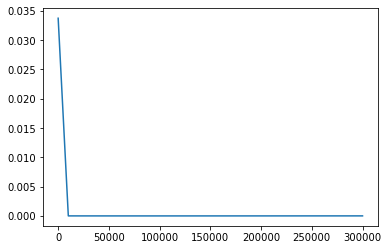

In [11]:
for i in range(0,iterations):
    if(i%30000==0):
        print("Cost at ",i,"th iteration",J_hist[i][0]*10000)
i=list(range(0,iterations))
plt.plot(i[::10000],J_hist[::10000])
plt.show()

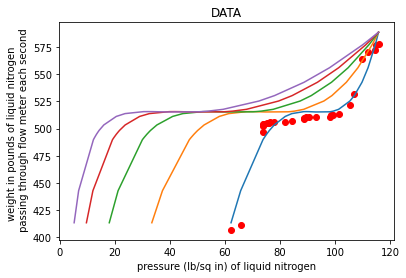

In [22]:
plt.title("DATA")
plt.xlabel("pressure (lb/sq in) of liquid nitrogen")
plt.ylabel("weight in pounds of liquid nitrogen \n passing through flow meter each second")
plt.scatter(x_train*x_scale,y_train*y_scale,color='r')
y_hat = np.zeros((1,m))
for i in range(0,m):
    y_hat[0][i] = np.dot(w_final, X_train[i,:]) + b_final
plt.plot(X_train*x_scale, y_hat[0,:]*y_scale)
plt.show()

In [14]:
data=float(input("Enter pressure of liquid Nitrogen:"))/x_scale
Data=np.array([data,data**2,data**3,data**4,data**5])
y=(np.dot(w_final,Data)+b_final)*y_scale
print("The weight in ounds of liquid nitrogen passing through flow per second",y)

Enter pressure of liquid Nitrogen:110
The weight in ounds of liquid nitrogen passing through flow per second [543.69476537]
